<a href="https://colab.research.google.com/github/MonitSharma/Computational-Methods-in-Physics/blob/main/Lecture04_Getting_Started_with_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Numpy

We are now moving on the useful libraries for scientific computing. The first one of interest is `numpy`. We load it like this:

In [1]:
import numpy as np

`numpy` is filled with basic math functions that you will use all the time.

In [2]:
print(np.sin(2), np.cos(np.pi))

0.9092974268256817 -1.0


Let's make our life easier and define

In [3]:
pi = np.pi

The most basic object is `numpy` is the `numpy` array. In some ways, this is just like a list, but it is designed so you can do lots of math operations quickly:

In [4]:
a = np.array([1,2,1,5,15,20,22,1,45,3])
print(a[0],a[-1], a[3])

1 3 5


In [5]:
b = np.ones(len(a))*35.1
print(b)

[35.1 35.1 35.1 35.1 35.1 35.1 35.1 35.1 35.1 35.1]


In [6]:
print(a+b)
print(a*b)
print(a**3)
print(b**3)

[36.1 37.1 36.1 40.1 50.1 55.1 57.1 36.1 80.1 38.1]
[  35.1   70.2   35.1  175.5  526.5  702.   772.2   35.1 1579.5  105.3]
[    1     8     1   125  3375  8000 10648     1 91125    27]
[43243.551 43243.551 43243.551 43243.551 43243.551 43243.551 43243.551
 43243.551 43243.551 43243.551]


Notice that this is **not** doing matrix or vector multiplication or addition. It is performing the operation on each element of the list. For this to work, it is essentiall that `a` and `b` are the same length. But it does understand what you mean if you act with number:

In [7]:
print(a*4)
print(a+4)

[  4   8   4  20  60  80  88   4 180  12]
[ 5  6  5  9 19 24 26  5 49  7]


But if you have two different sized arrays is doesn't know what to do

In [8]:
c = np.array([2,4,2])
a+c

ValueError: ignored

Numpy arrays actually have shapes so that they are more like matrices, tensors, etc

In [9]:
d = np.array([[1,2],[1,2]])
e = np.ones((3,3,3))
d.shape

(2, 2)

In [10]:
e = np.arange(9)

In [11]:
e.reshape((3,3))

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [12]:
e=np.arange(27)
f = e.reshape((3,3,3))
print(f)

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]


In [13]:
f[0,2]

array([6, 7, 8])

In [14]:
f**2

array([[[  0,   1,   4],
        [  9,  16,  25],
        [ 36,  49,  64]],

       [[ 81, 100, 121],
        [144, 169, 196],
        [225, 256, 289]],

       [[324, 361, 400],
        [441, 484, 529],
        [576, 625, 676]]])

These definitions are really useful because you can write a function like it acts on a single number, but if you're careful, it can act on the full array:

In [15]:
def position(t,x0,v,a):
  position=x0+v*t+a*t**2/2
  return position

In [16]:
t = np.linspace(0,100,1000)

In [17]:
d = position(t,50,-100.,3.)

In [18]:
import matplotlib.pyplot as plt

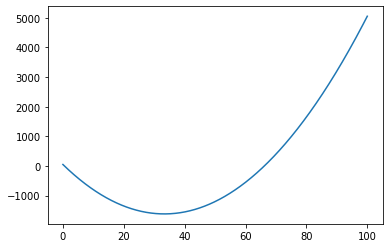

In [19]:
plt.plot(t,d)
plt.show()

We can also try something more complicated where we solve more than one problem at a time:

In [20]:
tarray=np.array((t,t,t))
print(tarray.shape)
varray=np.zeros(tarray.shape)
aarray=np.ones(tarray.shape)

(3, 1000)


In [21]:
varray[1,:]=np.ones(len(t))
varray[2,:]=np.ones(len(t))*2
aarray[1,:]=np.ones(len(t))*2
aarray[2,:]=np.ones(len(t))*3

In [22]:
darray=position(tarray,0,varray,aarray)

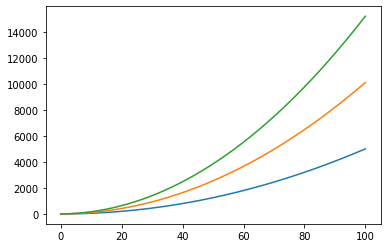

In [23]:
plt.plot(t,darray[0,:])
plt.plot(t,darray[1,:])
plt.plot(t,darray[2,:])
plt.show()

The key advantages of numpy are the orgnization (like the above example) and the speed. numpy is essentially a bunch of code that is commonly used, but written in C because it is faster than python. We can see this explicitely with an example

In [24]:
import time

In [25]:
def trad_version():
    t1 = time.time() # what is the time when I start
    X = range(int(1e7)) # arrange numbers 0, 10M -1
    Y = range(int(1e7)) # arrange numbers 0, 10M -1
    Z = [] 
    for i in range(len(X)):
        Z.append(X[i] + Y[i]) # make a new list by adding the elements of X and Y
    return time.time() - t1 # what is the difference from the time when I end and started


In [26]:
def numpy_version():
    t1 = time.time() # what is the time when I start
    X = np.arange(int(1e7)) # arrange numbers 0, 10M -1
    Y = np.arange(int(1e7))# arrange numbers 0, 10M -1
    Z = X + Y # make a new list by adding the elements of X and Y
    return time.time() - t1 # what is the difference from the time when I end and started


In [27]:
print(trad_version(),numpy_version())

4.038429498672485 0.06480884552001953


So we see that `numpy` about 25x faster than doing the same thing with a list. The commands are all very similar too.

## Some basic numpy tools

A very convenient tool is to be able to make arrays of a given size and shape quickly. Here are a few very common examples:


In [28]:
print(np.arange(10))
print(np.arange(3,14))
print(np.arange(3,14,2))
print(np.arange(0,1,0.1))

[0 1 2 3 4 5 6 7 8 9]
[ 3  4  5  6  7  8  9 10 11 12 13]
[ 3  5  7  9 11 13]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [29]:
print(np.linspace(2,5,10))
print(np.linspace(2,5,10,endpoint=False))

[2.         2.33333333 2.66666667 3.         3.33333333 3.66666667
 4.         4.33333333 4.66666667 5.        ]
[2.  2.3 2.6 2.9 3.2 3.5 3.8 4.1 4.4 4.7]


In [30]:
print(np.logspace(0,2,10))

[  1.           1.66810054   2.7825594    4.64158883   7.74263683
  12.91549665  21.5443469   35.93813664  59.94842503 100.        ]


In [31]:
print(np.ones((3,3)))
print(np.ones(10))
print(np.zeros((3,3)))
print(np.zeros(10))

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [32]:
np.diag((1,2,3))

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [33]:
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

All of these quickly generate a numpy array of a given shape. arange, linspace and logspace quickly give you an ordered list of numbers. When you are sampling value of a function, solving a differential equation, etc. these all come in handy.

ones is often useful if you just one to have a constant array, e.g. if you want to plot a horizonal line:

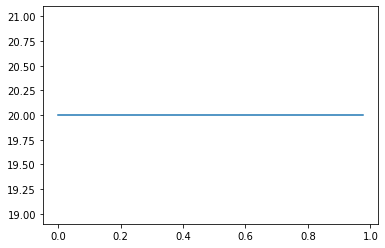

In [34]:
x=np.arange(0,1,0.025)
plt.plot(x,np.ones(len(x))*20)

zeros can be useful just to create an array of a given shape that you want to populate with values later. E.g. I want to find a value to put in, but it isn't easily expressable as an operation on the arrays

In [35]:
y=np.zeros(len(x))
for i in range(len(x)):
    y[i]=x[i:].sum() # add up all the numbers in x, starting at the ith location
print(y)

[19.5   19.5   19.475 19.425 19.35  19.25  19.125 18.975 18.8   18.6
 18.375 18.125 17.85  17.55  17.225 16.875 16.5   16.1   15.675 15.225
 14.75  14.25  13.725 13.175 12.6   12.    11.375 10.725 10.05   9.35
  8.625  7.875  7.1    6.3    5.475  4.625  3.75   2.85   1.925  0.975]


zeros is also useful because you can quickly see if you did something wrong if there are too many entries that are still zero.

One of the very useful features of sum is that we can sum only a long one particular row or column of a numpy array with a more complicated shape. E.g. suppose we have an array with a shape (3,3) and we want to sum along each row to get an array of shape (3,) that represents these three results:

In [36]:
sum_test=np.arange(9).reshape(3,3)
print(sum_test)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


I can just add up all the numbers in the array as usual

In [37]:
sum_test.sum()

36

But to sum along only the row or colum, I use the axis option

In [38]:
sum_test.sum(axis=0)

array([ 9, 12, 15])

In [39]:
sum_test[:,0].sum()

9

In [40]:
sum_test.sum(axis=1)


array([ 3, 12, 21])

In [41]:
sum_test[0,:].sum()

3

This will be very useful, because it allows us to solve many problems simulaneously. E.g. we can imagine a (3,3) array as three different vectors. E.g. let's say I had 100 different vectors and I wanted to know the length of each one. Then I would do:

In [42]:
vec100=np.arange(300).reshape(100,3)
print(vec100[0:5,:]) 

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


We calculate the length of every vector by suming the square along the second index (axis 1):

In [43]:
length2=(vec100**2).sum(axis=1)

In [44]:
np.sqrt(length2)

array([  2.23606798,   7.07106781,  12.20655562,  17.3781472 ,
        22.56102835,  27.74887385,  32.93933818,  38.13135193,
        43.32435804,  48.51803788,  53.71219601,  58.9067059 ,
        64.10148204,  69.29646456,  74.49161027,  79.68688725,
        84.88227141,  90.0777442 ,  95.27329112, 100.46890066,
       105.6645636 , 110.86027242, 116.05602096, 121.25180411,
       126.44761761, 131.64345787, 136.83932183, 142.0352069 ,
       147.23111084, 152.42703172, 157.62296787, 162.81891782,
       168.01488029, 173.21085416, 178.40683843, 183.60283222,
       188.79883474, 193.99484529, 199.19086324, 204.38688803,
       209.58291915, 214.77895614, 219.97499858, 225.1710461 ,
       230.36709835, 235.56315501, 240.75921582, 245.95528049,
       251.15134879, 256.34742051, 261.54349543, 266.73957337,
       271.93565415, 277.13173763, 282.32782364, 287.52391205,
       292.72000273, 297.91609557, 303.11219045, 308.30828727,
       313.50438593, 318.70048635, 323.89658844, 329.09

We solved 100 problems at once without having to write a for loop.

## Meshgrids

A useful tool when dealing with numpy arrays is the meshgrid. It allows us to take a multiple vectors and use them to define a higher dimensional space. The obviuos example is that you have variables x, y and you want to define a function of (x,y). E.g. Let's define an electric field in terms of x and y on a grid

In [45]:
Lx=1.
Ly=2.
n=5
x_array=np.linspace(0,Lx,n,endpoint=True)
y_array=np.linspace(0,Ly,n,endpoint=True)

so x_array and y_array are just 1d numpy arrays that list the x and y coordinates we want. Now suppose you want $E_x = 5 \sin(2. \pi x/ Lx) \cos(2. \pi y/Ly)$ . You can't just multiply np.sin(x_array) np.cos(y_array) because that will return a 1d array of n values. You want it to give a array of (n,n) as the shape (i.e. it gives a different value for each x and y you use. So we make a meshgrid

In [46]:
x,y=np.meshgrid(x_array,y_array,indexing='ij')

In [47]:
print(x)
print(x[:,0])
print(x[0,:])

[[0.   0.   0.   0.   0.  ]
 [0.25 0.25 0.25 0.25 0.25]
 [0.5  0.5  0.5  0.5  0.5 ]
 [0.75 0.75 0.75 0.75 0.75]
 [1.   1.   1.   1.   1.  ]]
[0.   0.25 0.5  0.75 1.  ]
[0. 0. 0. 0. 0.]


In [48]:
print(y)
print(y[:,0])
print(y[0,:])

[[0.  0.5 1.  1.5 2. ]
 [0.  0.5 1.  1.5 2. ]
 [0.  0.5 1.  1.5 2. ]
 [0.  0.5 1.  1.5 2. ]
 [0.  0.5 1.  1.5 2. ]]
[0. 0. 0. 0. 0.]
[0.  0.5 1.  1.5 2. ]


So now we can define the x-component of the electric field just by multiplying the arrays:

In [49]:
Ex=5*np.sin(2.*pi*x/ Lx)*np.cos(2.*pi*y/Ly)

In [50]:
Ex

array([[ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00],
       [ 5.00000000e+00,  3.06161700e-16, -5.00000000e+00,
        -9.18485099e-16,  5.00000000e+00],
       [ 6.12323400e-16,  3.74939946e-32, -6.12323400e-16,
        -1.12481984e-31,  6.12323400e-16],
       [-5.00000000e+00, -3.06161700e-16,  5.00000000e+00,
         9.18485099e-16, -5.00000000e+00],
       [-1.22464680e-15, -7.49879891e-32,  1.22464680e-15,
         2.24963967e-31, -1.22464680e-15]])

In [51]:
Ey=10.*np.sin(2.*pi*y/Ly)

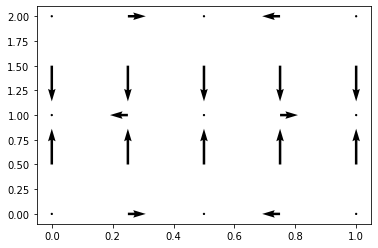

In [52]:
plt.figure()
plt.quiver(x, y, Ex, Ey, units='width')
plt.show()

Now let's try in for 3d (x,y,z). Let's just make a temperature in a box so that $T(x,y,z)= (x+2y) z$. So we want to add a z-variable and make a higher dimensional array:

In [53]:
Lz=3
z_array=np.linspace(0,Lz,n,endpoint=True)

In [54]:
x,y,z=np.meshgrid(x_array,y_array,z_array)

In [55]:
print(x[0,:,0])
print(y[:,0,0])
print(z[0,0,:])

[0.   0.25 0.5  0.75 1.  ]
[0.  0.5 1.  1.5 2. ]
[0.   0.75 1.5  2.25 3.  ]


In [56]:
T=(x+2*y)*z

In [57]:
T

array([[[ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.1875,  0.375 ,  0.5625,  0.75  ],
        [ 0.    ,  0.375 ,  0.75  ,  1.125 ,  1.5   ],
        [ 0.    ,  0.5625,  1.125 ,  1.6875,  2.25  ],
        [ 0.    ,  0.75  ,  1.5   ,  2.25  ,  3.    ]],

       [[ 0.    ,  0.75  ,  1.5   ,  2.25  ,  3.    ],
        [ 0.    ,  0.9375,  1.875 ,  2.8125,  3.75  ],
        [ 0.    ,  1.125 ,  2.25  ,  3.375 ,  4.5   ],
        [ 0.    ,  1.3125,  2.625 ,  3.9375,  5.25  ],
        [ 0.    ,  1.5   ,  3.    ,  4.5   ,  6.    ]],

       [[ 0.    ,  1.5   ,  3.    ,  4.5   ,  6.    ],
        [ 0.    ,  1.6875,  3.375 ,  5.0625,  6.75  ],
        [ 0.    ,  1.875 ,  3.75  ,  5.625 ,  7.5   ],
        [ 0.    ,  2.0625,  4.125 ,  6.1875,  8.25  ],
        [ 0.    ,  2.25  ,  4.5   ,  6.75  ,  9.    ]],

       [[ 0.    ,  2.25  ,  4.5   ,  6.75  ,  9.    ],
        [ 0.    ,  2.4375,  4.875 ,  7.3125,  9.75  ],
        [ 0.    ,  2.625 ,  5.25  ,  7.875 , 10.5   ],
    

Now we see that there is an easier way we could find the distance for a bunch of different, time, velocities and accelertaions all at once!

In [58]:
num=20
t_list=np.linspace(0,10,100)
v_list=2*np.linspace(0,10,num)
a_list=3*np.linspace(0,1,num)

In [59]:
print(a_list)

[0.         0.15789474 0.31578947 0.47368421 0.63157895 0.78947368
 0.94736842 1.10526316 1.26315789 1.42105263 1.57894737 1.73684211
 1.89473684 2.05263158 2.21052632 2.36842105 2.52631579 2.68421053
 2.84210526 3.        ]


In [60]:
t,v,a=np.meshgrid(t_list,v_list,a_list)

In [61]:
final_d=position(t,0,v,a)

In [62]:
final_d[1,:,2]

array([ 0.        ,  0.10793743,  0.21909687,  0.33347832,  0.45108179,
        0.57190727,  0.69595476,  0.82322427,  0.95371579,  1.08742932,
        1.22436486,  1.36452242,  1.50790199,  1.65450357,  1.80432716,
        1.95737277,  2.11364039,  2.27313002,  2.43584167,  2.60177533,
        2.770931  ,  2.94330868,  3.11890838,  3.29773009,  3.47977381,
        3.66503955,  3.8535273 ,  4.04523706,  4.24016883,  4.43832262,
        4.63969842,  4.84429623,  5.05211606,  5.26315789,  5.47742175,
        5.69490761,  5.91561548,  6.13954537,  6.36669728,  6.59707119,
        6.83066712,  7.06748506,  7.30752501,  7.55078698,  7.79727096,
        8.04697695,  8.29990495,  8.55605497,  8.815427  ,  9.07802104,
        9.3438371 ,  9.61287516,  9.88513524, 10.16061734, 10.43932144,
       10.72124756, 11.0063957 , 11.29476584, 11.586358  , 11.88117217,
       12.17920835, 12.48046655, 12.78494676, 13.09264898, 13.40357321,
       13.71771946, 14.03508772, 14.35567799, 14.67949028, 15.00

In [63]:
t[0,:,0]

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

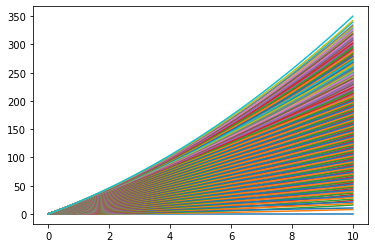

In [64]:
for i in range(num):
    for j in range(num):
        plt.plot(t_list,final_d[i,:,j])

Look, we found 400 solution at 100 points in time and plotted all of them without breaking a sweat!